In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
%matplotlib inline
from scipy import stats
data_path='../../'

In [3]:
df=pd.read_csv(data_path+'Data/Clean_Income.csv',encoding='latin-1')
df


,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32520,720296,72,Puerto Rico,PR,Adjuntas Municipio,Guaynabo,Adjuntas,Track,Track,970,787,589417,1691,18.397925,-66.130633,30649,13729,37977,1321.278082
32521,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,1801613,795887,18.385424,-67.203310,15520,9923,15541,238.813450
32522,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,11031227,0,18.356565,-67.180686,41933,34054,31539,313.551070
32523,7202986,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,0,33597561,18.412041,-67.213413,0,0,0,0.000000


In [4]:
df.Primary.value_counts()

Track    29432
place     3093
Name: Primary, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32525 entries, 0 to 32524
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32525 non-null  int64  
 1   State_Code  32525 non-null  int64  
 2   State_Name  32525 non-null  object 
 3   State_ab    32525 non-null  object 
 4   County      32525 non-null  object 
 5   City        32525 non-null  object 
 6   Place       32525 non-null  object 
 7   Type        32525 non-null  object 
 8   Primary     32525 non-null  object 
 9   Zip_Code    32525 non-null  int64  
 10  Area_Code   32525 non-null  int64  
 11  ALand       32525 non-null  int64  
 12  AWater      32525 non-null  int64  
 13  Lat         32525 non-null  float64
 14  Lon         32525 non-null  float64
 15  Mean        32525 non-null  int64  
 16  Median      32525 non-null  int64  
 17  Stdev       32525 non-null  int64  
 18  sum_w       32525 non-null  float64
dtypes: float64(3), int64(9), 

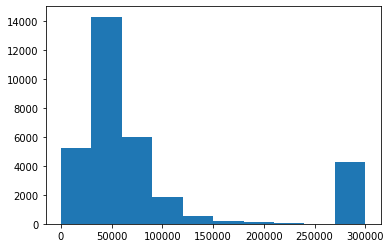

In [6]:
plt.hist(df.Median);

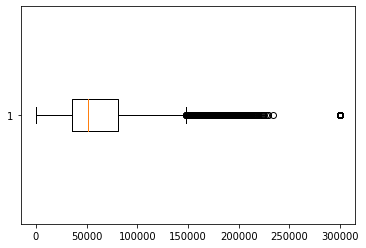

In [7]:
plt.boxplot(df.Median, vert=False);

In [8]:
df.corr()

,id,State_Code,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
id,1.000000,0.284049,-0.029362,0.022085,-0.016832,-0.011220,-0.100341,0.091028,0.036741,0.068294,0.024017,-0.028974
State_Code,0.284049,1.000000,-0.258408,0.045257,-0.019468,-0.024890,0.094598,0.314623,-0.074009,-0.026211,-0.089111,-0.010373
Zip_Code,-0.029362,-0.258408,1.000000,-0.002932,0.064128,0.028604,-0.061880,-0.923842,-0.008059,-0.001382,-0.017937,0.005560
Area_Code,0.022085,0.045257,-0.002932,1.000000,0.017280,0.019284,-0.122867,-0.012251,0.012539,0.018119,-0.000873,0.001766
ALand,-0.016832,-0.019468,0.064128,0.017280,1.000000,0.558647,0.092123,-0.098972,-0.020274,-0.023317,-0.006317,0.001135
AWater,-0.011220,-0.024890,0.028604,0.019284,0.558647,1.000000,0.067766,-0.061819,-0.014467,-0.012340,-0.014533,-0.001224
Lat,-0.100341,0.094598,-0.061880,-0.122867,0.092123,0.067766,1.000000,0.004654,0.136268,0.086956,0.117035,-0.010335
Lon,0.091028,0.314623,-0.923842,-0.012251,-0.098972,-0.061819,0.004654,1.000000,-0.043835,-0.028490,-0.033602,-0.001127
Mean,0.036741,-0.074009,-0.008059,0.012539,-0.020274,-0.014467,0.136268,-0.043835,1.000000,0.541713,0.844317,-0.016502
Median,0.068294,-0.026211,-0.001382,0.018119,-0.023317,-0.012340,0.086956,-0.028490,0.541713,1.000000,0.329264,-0.038896


In [9]:
corr=df.corr()

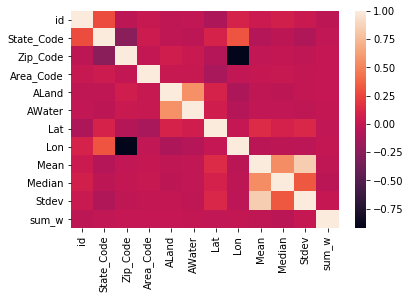

In [10]:
sns.heatmap(corr)

In [11]:
mask=np.triu(np.ones_like(df.corr(), dtype=np.bool))

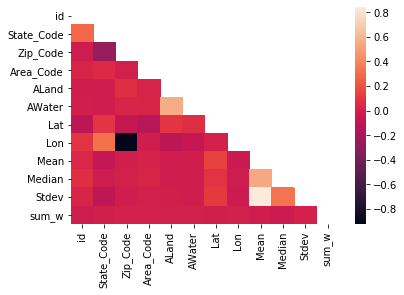

In [12]:
corr_2=sns.heatmap(corr,mask=mask)

Target Varuable:Mean house house hold income
Features= latitude, areacode

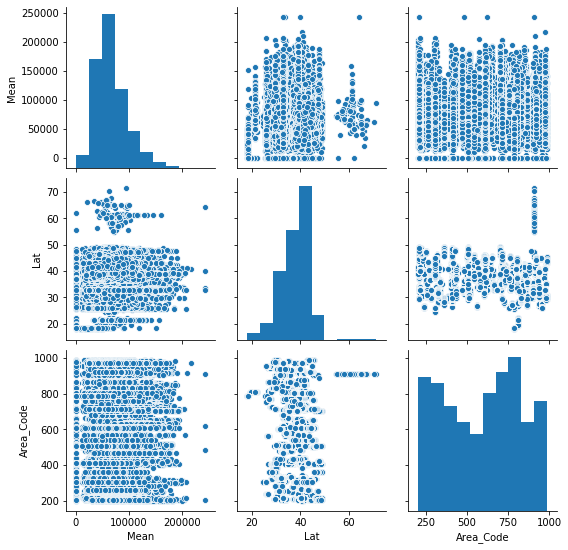

In [13]:
sns.pairplot(df,vars=['Mean','Lat','Area_Code']);

# Creating first Linear regression model

In [14]:
from statsmodels.formula.api import ols
fsm_df=pd.DataFrame([df['Mean'],df['Lat']])
fsm_df= fsm_df.transpose()
fsm_df

,Mean,Lat
0,38773.0,30.771450
1,37725.0,31.708516
2,54606.0,33.191452
3,63919.0,30.874343
4,77948.0,30.250913
...,...,...
32520,30649.0,18.397925
32521,15520.0,18.385424
32522,41933.0,18.356565
32523,0.0,18.412041


In [15]:
fsm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32525 entries, 0 to 32524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mean    32525 non-null  float64
 1   Lat     32525 non-null  float64
dtypes: float64(2)
memory usage: 508.3 KB


In [16]:
formula="Mean~Lat"

In [17]:
fsm=ols(formula=formula,data=fsm_df).fit()

In [18]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mean   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     615.3
Date:                Sun, 28 Jun 2020   Prob (F-statistic):          1.37e-134
Time:                        20:47:23   Log-Likelihood:            -3.8163e+05
No. Observations:               32525   AIC:                         7.633e+05
Df Residuals:                   32523   BIC:                         7.633e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.864e+04   1143.590     33.789      0.000    3.64e+04    4.09e+04
Lat          743.7420     29.982     24.806      0.000     684.976     802.508
==============================================================================
Omnibus:                     4963.524   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8432.259
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                       4.450   Cond. No.                         261.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
fsm.rsquared

0.01856910312237392

In [20]:
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
rainbow_statistic, rainbow_p_value =linear_rainbow(fsm)
print(rainbow_statistic)
print(rainbow_p_value)

1.0911476569685277
1.342410782921522e-08


In [21]:
fsm_resids=fsm.resid

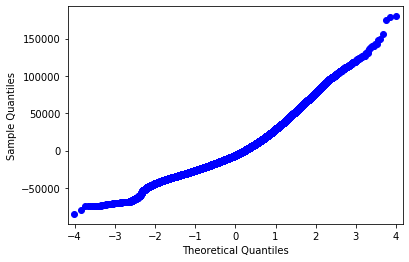

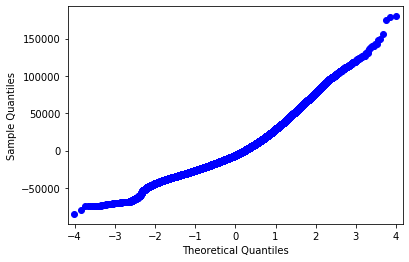

In [22]:

import statsmodels.api as sm
sm.qqplot(fsm_resids)

In [23]:
y_hat=fsm.predict()

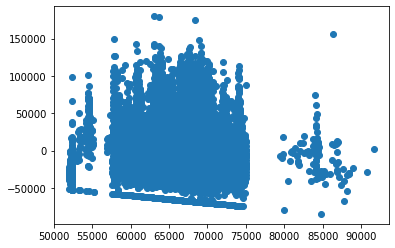

In [24]:
plt.scatter(y_hat,fsm_resids);

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [26]:
y=fsm_df.Mean
X=fsm_df.drop('Mean',axis=1)

In [27]:
lr.fit(X,y)

LinearRegression()

In [28]:
score=lr.score(X,y)
score
print(lr.intercept_)
print(lr.coef_)#the increase in y as we increase 1 unit in X in this case mean income crease by 743 dollors as we increase 1 latitude up

38640.982336910354
[743.74198556]


2nd model aka multiple regression

In [29]:
model_2_df=pd.DataFrame([df['Mean'],df['Lat'],df['Area_Code']])
model_2_df=model_2_df.transpose()

In [30]:
model_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32525 entries, 0 to 32524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mean       32525 non-null  float64
 1   Lat        32525 non-null  float64
 2   Area_Code  32525 non-null  float64
dtypes: float64(3)
memory usage: 762.4 KB


In [31]:
formula_2="Mean~Lat+Area_Code"

In [32]:
model2= ols(formula=formula_2,data=model_2_df).fit()

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mean   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     322.4
Date:                Sun, 28 Jun 2020   Prob (F-statistic):          2.31e-139
Time:                        20:47:25   Log-Likelihood:            -3.8162e+05
No. Observations:               32525   AIC:                         7.632e+05
Df Residuals:                   32522   BIC:                         7.633e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.558e+04   1276.859     27.868      0.000    3.31e+04    3.81e+04
Lat          763.6795     30.198     25.289      0.000     704.490     822.869
Area_Code      3.8906      0.724      5.373      0.000       2.471       5.310
==============================================================================
Omnibus:                     4980.046   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8488.092
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       4.461   Cond. No.                     4.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
y=model_2_df["Mean"]
X=model_2_df.drop('Mean',axis=1)

In [35]:
lr.fit(X,y)

LinearRegression()

In [36]:
lr.intercept_

35583.804275882896

In [37]:
lr.score(X,y)

0.019439683287783893

In [38]:
y_hat2=model2.predict()

In [39]:
model2_resids=model2.resid

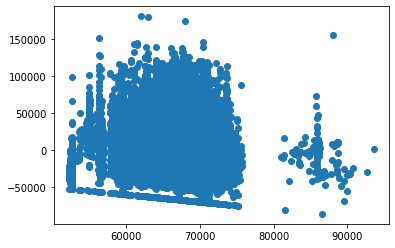

In [40]:
plt.scatter(y_hat2,model2_resids)

In [41]:
lm,lm_p_value, f_value, f_p_value=het_breuschpagan(model2_resids,model_2_df.drop('Mean',axis=1))


In [42]:
print(lm_p_value)

0.0


In [64]:
model_3_df=pd.DataFrame([df['Mean'],df['Lat'],df['Area_Code'],df["Primary"]])
model_3_df=model_3_df.transpose()
model_3_df

,Mean,Lat,Area_Code,Primary
0,38773,30.7715,251,place
1,37725,31.7085,334,place
2,54606,33.1915,205,place
3,63919,30.8743,251,place
4,77948,30.2509,251,place
...,...,...,...,...
32520,30649,18.3979,787,Track
32521,15520,18.3854,787,Track
32522,41933,18.3566,787,Track
32523,0,18.412,787,Track


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

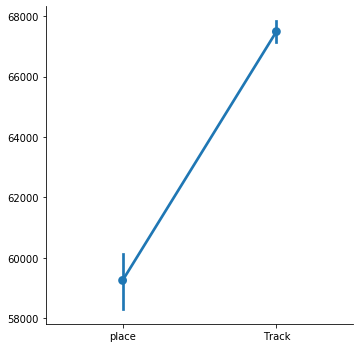

In [44]:
sns.catplot(x=df['Primary'],y=df['Mean'],data=model_3_df,kind="point");

In [45]:
from sklearn.preprocessing import LabelEncoder


In [46]:
label_encoder=LabelEncoder()

In [47]:
primary_labels=label_encoder.fit_transform(model_3_df['Primary'])

In [48]:
np.unique(primary_labels, return_counts=True)

(array([0, 1]), array([29432,  3093], dtype=int64))

In [49]:
label_encoder.classes_

array(['Track', 'place'], dtype=object)

track=0 and place=1

In [50]:
model_3_df['Primary_encoded']=primary_labels

In [51]:
model_3_df['Primary_encoded']

0        1
1        1
2        1
3        1
4        1
        ..
32520    0
32521    0
32522    0
32523    0
32524    0
Name: Primary_encoded, Length: 32525, dtype: int32

In [52]:
model_3_df=model_3_df.drop(columns=['Primary'])


In [53]:
model_3_df

,Mean,Lat,Area_Code,Primary_encoded
0,38773,30.7715,251,1
1,37725,31.7085,334,1
2,54606,33.1915,205,1
3,63919,30.8743,251,1
4,77948,30.2509,251,1
...,...,...,...,...
32520,30649,18.3979,787,0
32521,15520,18.3854,787,0
32522,41933,18.3566,787,0
32523,0,18.412,787,0


In [54]:
formula3='Mean~Primary_encoded+Lat+Area_Code'

In [55]:
X=model_3_df.drop(['Mean'],axis=1)
y=model_3_df['Mean']

In [56]:
lr.fit(X,y)

LinearRegression()

In [60]:
lr.score(X,y)

0.02706791374166384

In [61]:
model3=ols(formula=formula3, data=model_3_df).fit()

KeyboardInterrupt: 

In [ ]:
model3.summary()

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
ohe= OneHotEncoder(sparse=False)

In [66]:
primary_location_ohe=ohe.fit_transform(model_3_df[['Primary']])

In [67]:
primary_ohe_df=pd.DataFrame(primary_location_ohe)

In [68]:
primary_ohe_df

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
32520,1.0,0.0
32521,1.0,0.0
32522,1.0,0.0
32523,1.0,0.0


In [ ]:
# NOTE: WfntLocation column was numbered 0-9 and I changed those to the actual location  
# names before executing the below code
from sklearn.preprocessing import OneHotEncoder
# We want an array instead of a matrix so we set sparse to "False"
# Fit and transform the WfntLocation column
# Create a df of the array
ohe = OneHotEncoder(sparse=False)
wfnt_location = ohe.fit_transform(wfnt_df[['WfntLocation']])
ohe_df = pd.DataFrame(wfnt_location) 
# Set the column headers to the categorical variables that were inputted into WfntLocation
ohe_df.columns= list(ohe.categories_[0])
# We want our results to be in relation to houses without waterfront so we choose that 
# column to drop
ohe_df.drop('NOT WATERFRONT',axis=1, inplace=True)
# Concatenate the resulting df onto the original and use these columns in your model instead of WfntLocation